### Stock Price Prediction 

**Description:** This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. 

In [2]:
!pip install -q --upgrade pandas
!pip install -q --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 20.2 MB/s 


In [15]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start='2014-01-01', end='2021-12-17')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.444426
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.061243
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.154276
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.031593
2014-01-08,19.484285,19.238930,19.243214,19.409286,258529600.0,17.139448
...,...,...,...,...,...,...
2021-12-13,182.130005,175.529999,181.119995,175.740005,153237000.0,175.015793
2021-12-14,177.740005,172.210007,175.250000,174.330002,139380400.0,173.611588
2021-12-15,179.500000,172.309998,175.110001,179.300003,131063300.0,178.561111


In [5]:
# Get the number of rows and columns in the dataset
df.shape

(2006, 6)

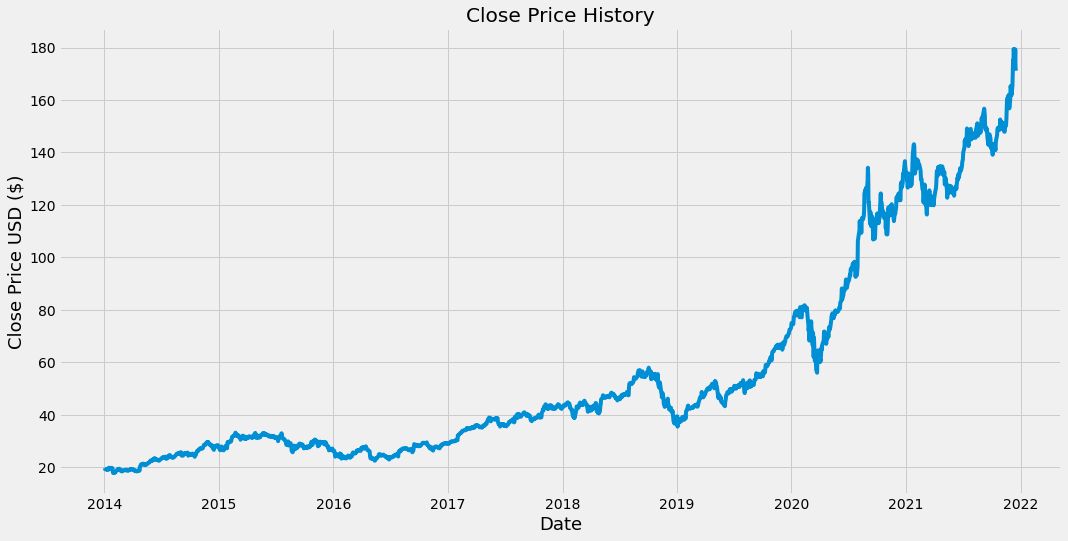

In [6]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new dataframewith only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1605

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01179053],
       [0.00910534],
       [0.0097573 ],
       ...,
       [0.99907182],
       [0.95550761],
       [0.94857697]])

In [9]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train datasets 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01179053, 0.00910534, 0.0097573 , 0.0088976 , 0.00965343,
       0.00811966, 0.00732847, 0.00794508, 0.01030097, 0.01272537,
       0.01203806, 0.00903683, 0.01089326, 0.01143251, 0.01246459,
       0.01023025, 0.01120928, 0.00148515, 0.00021438, 0.        ,
       0.00018122, 0.00038676, 0.00199123, 0.00283105, 0.00281337,
       0.00439797, 0.00645551, 0.00799591, 0.00798706, 0.00986781,
       0.00977055, 0.01021257, 0.00830752, 0.00693287, 0.00562896,
       0.00613726, 0.00492396, 0.00388303, 0.00616379, 0.00584776,
       0.00618368, 0.00695276, 0.00720029, 0.00684447, 0.00677597,
       0.00688205, 0.00802463, 0.00813955, 0.00682238, 0.0055052 ,
       0.00595825, 0.00698812, 0.00695719, 0.00639142, 0.007313  ,
       0.00870975, 0.00999156, 0.00884013, 0.0083274 , 0.0081948 ])]
[0.008168290766086744]

[array([0.01179053, 0.00910534, 0.0097573 , 0.0088976 , 0.00965343,
       0.00811966, 0.00732847, 0.00794508, 0.01030097, 0.01272537,
       0.01203806, 0.00903683, 0.0

In [10]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1545, 60, 1)

In [17]:
# Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
# Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs=1)

1545/1545 [==============================] - 48s 29ms/step - loss: 3.5752e-04


In [20]:
# Create the test data set 
# Create a new array containing scaled values from index 1545 to 2005
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [21]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [22]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 2s 17ms/step


In [24]:
# Get the root mean squared error (RMSE) 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.993754741259644

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


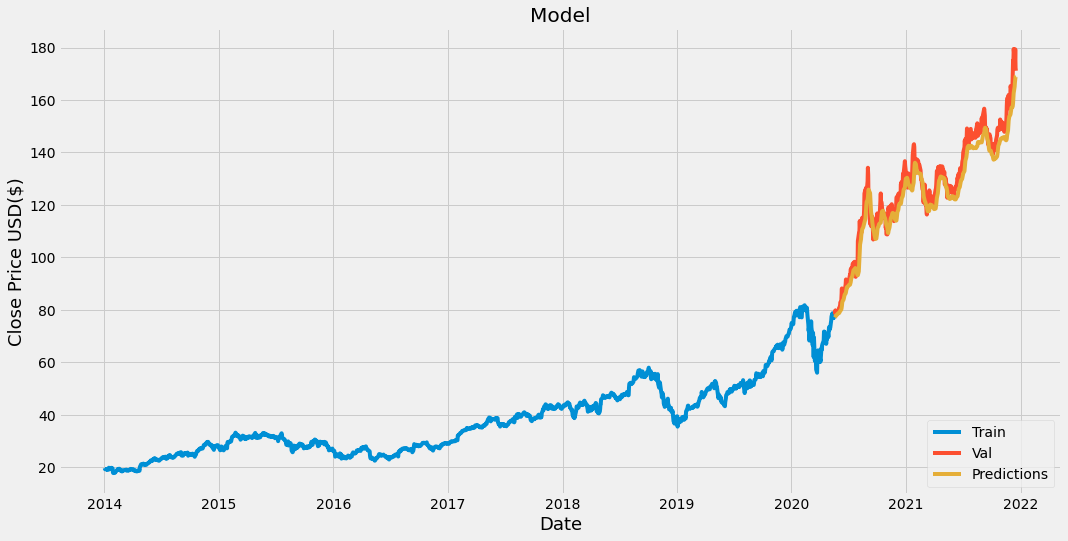

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-05-19,78.285004,77.120796
2020-05-20,79.807503,77.314720
2020-05-21,79.212502,77.642525
2020-05-22,79.722504,77.933693
2020-05-26,79.182503,78.231522
...,...,...
2021-12-13,175.740005,165.056656
2021-12-14,174.330002,166.819260
2021-12-15,179.300003,167.854950


In [31]:
# Get the Quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2014-01-01', end='2021-12-20')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 24ms/step
[[167.35448]]


In [32]:
# Get the Quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-12-21', end='2021-12-21')
print(apple_quote2['Close'])

Date
2021-12-21    172.990005
Name: Close, dtype: float64
